<br>

# MACHINE LEARNING AND STATISTICS PROJECT 2020

In this notebook I am creating my project for the Machine Learning and Statistics 2020 module.
the following sections: 

References used for this project completion, project instructions as specified by the lecturer, the purpose of the project, and the different sections explaining the processes with markdown cells along with further comments inside the code cells. 

***
References

- [Fundamentals DA project's repository ](https://github.com/Ainara12/Fundamentals-Project/blob/master/Fundamentals%20DA-Project.ipynb)

- [Introduction to Linear and Polynomial Regression](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)

- [Numpy polyfit function documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

- [Numpy poly1d function documentation](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)

- [Lecturer's simple linear regression Jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb)

- [Machine Learning Polynomial Regression](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

- [Introduction to Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/)

- [Lecturer's linear regression in Keras Jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb)

- [Neural network with Keras tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

- [Classification and regression using Keras tutorial](https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/)
 
- [Linear regression using Python Sklearn video tutorial](https://www.youtube.com/watch?v=b0L47BeklTE&ab_channel=RylanFowers)
 
- [How to deploy a machine learning module using flask](https://towardsdatascience.com/deploy-a-machine-learning-model-using-flask-da580f84e60c)
 
- [Saving a machine learning model](https://www.geeksforgeeks.org/saving-a-machine-learning-model/)

- [How to save ML models](https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models)

 ***

<br>

## Project instructions

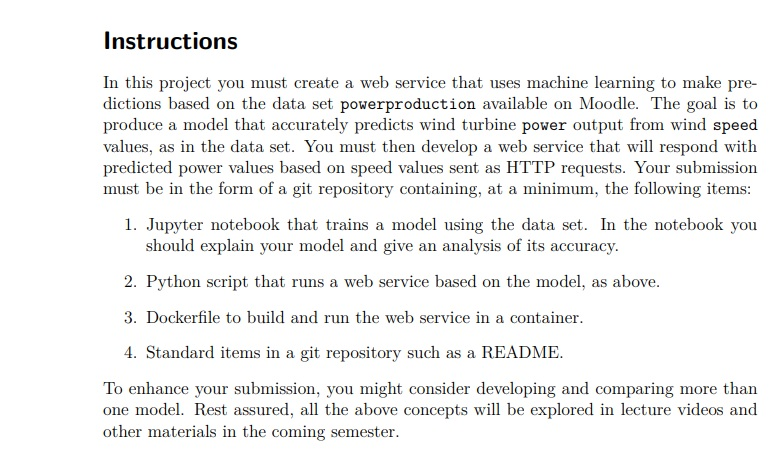

<br>

## Overall purpose of this project

My goal with this project is to use machine learning to make predictions using the 'powerproduction' dataset. I have some works done for this in my project for the module Fundamentals of Data Analysis  that I will use as reference to create a model that predicts output wind turbine power from wind speed values [Link to Fundamentals DA project in github](https://github.com/Ainara12/Fundamentals-Project/blob/master/Fundamentals%20DA--Project.ipynb).Once this model is complete I will create a script that runs a web service based on this model and a Dockerfile to build and run the web service in a container. 

To achieve this goal I am using the information and knowledge gathered during the course of this module along with the references consulted and detailed in this document. 


<br>

## Dataset analysis

### Loading and observing raw dataset

Before we get into create a prediction model, I am looking into the raw dataset to get a feel into how it looks and see some descriptive statistics. See works in code cells below:


In [1]:
#Importing the modules I am going to use

import pandas as pd #to load and organize dataset
import matplotlib.pyplot as plt #for visualisation
import numpy as np #to work with arrays and apply regression functions

#loading dataset
data=pd.read_csv(r'Powerproduction dataset.csv', header=0) 

#converting this dataset into dataframe with pandas 

powerdata=pd.DataFrame (data, columns = ['speed','power'])

print(powerdata)


      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [4]:
#initially describing dataset using pandas functionalities

powerdata.describe()

,speed,power
count,499.000000,499.000000
mean,12.615629,48.110806
std,7.210158,41.600619
min,0.125000,0.000000
25%,6.381000,5.323500
50%,12.563000,41.692000
75%,18.781500,93.547000
max,25.000000,113.556000


<br>

The code cells above show us the structure of this dataset. This dataset is based on a real life scenario in which we have 499 rows (initially 500 but I dropped first row as had no information on it) and two columns for wind speed and power generated. 
The dataset shows the relation between the wind speed and the power output derived from this speed.

Using command describe we get some general information such as the mean or average for 'speed' being 12.62 while power has 48.11, the std and minimum and max values. 

Now on the cells below I am plotting this data so we can see a clearer picture of the correlation of these 2 variables. 

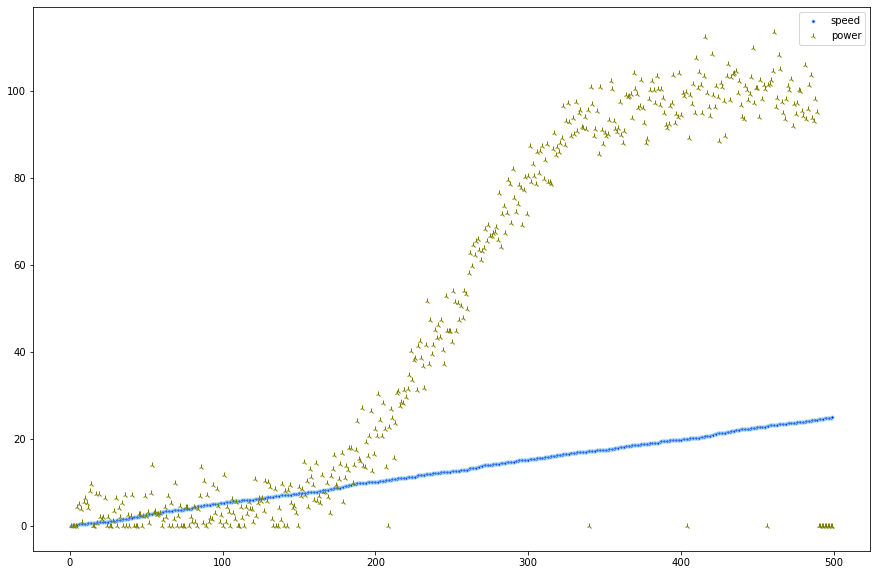

In [5]:
#Plotting raw dataset

%matplotlib inline
plt.rcParams['figure.figsize']=([15, 10])

#plotting, speed is shown blue dots while power is the green section
plt.plot( 'speed', 'y1', data=powerdata, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=4)
plt.plot( 'power', 'y2', data=powerdata, marker='2', color='olive', linewidth=4)

plt.legend()#adding legend

plt.show()

<br>

As seen above and considering my analysis in [Fundamentals-DA project's repository](https://github.com/Ainara12/Fundamentals-Project/blob/master/Fundamentals%20DA--Project.ipynb), I have concluded that this dataset seems to fit better in a Polynomial Linear Regression. 

A Polynomial Linear Regression, uses the relationship between the variables to find the best way to draw a line between data points, but this line does not need to be straight.

This type of linear regression has some advantages that might be useful for this dataset analysis and prediction, such as :

- It has a broad range of functions that can be a fit under it.
- It fits a wide range of curvature source.

Some inconvenientes might also arise:

- The presence of outliers can affect very hard the results
- There are in general fewer model validation tools for the detection of outliers in this type of regression than for simple linear.

See below an example on how I created the curve that fits this data and found the **R-Squared value** to be very high ( closer to 1). 

In order to apply the polynomial regression to our plot I  am creating a variable that will use **numpy poly1d** and **numpy polyfit** functions to generate this curve to fit the data. 


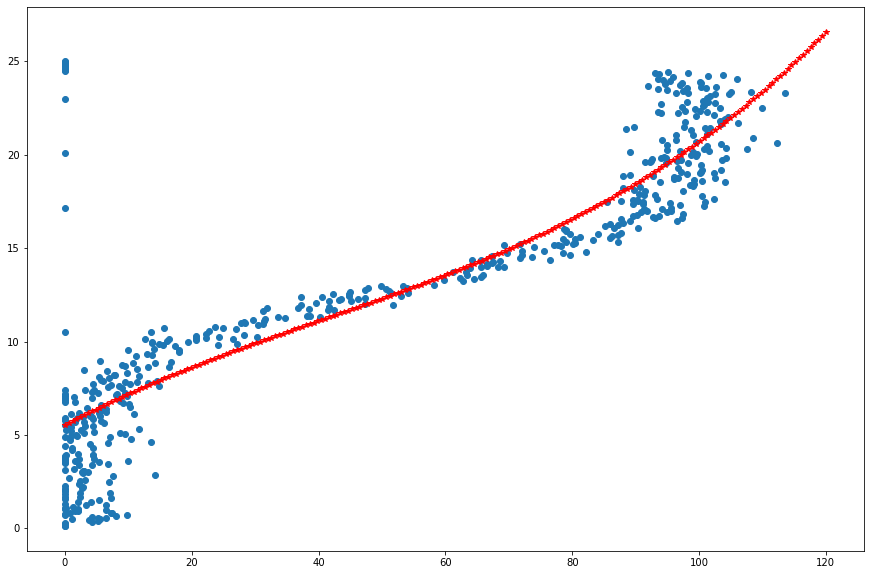

In [6]:
#Applying Polynomial regression to our plot:

#first I separate the 2 variables to represent them 
power=powerdata['speed']
speed=powerdata['power']

Polynom=np.poly1d(np.polyfit(speed, power,deg=3))

xline=np.linspace(0.0, 120, 200) # creatingand even spaced axis

#plotting these elements with a scatter plot
plt.rcParams['figure.figsize']=([15, 10])

plt.scatter( speed, power)# Using scatterplot to represent the two variables 
plt.plot(xline, Polynom(xline), 'r*')#using function to add our xline along wit the result of the poly1d and polyfit functions 

plt.show()


<br> 

Now we calculate **R-squared value** also called **Coefficient of determination** , this value measures how well a regression model fits to the data. We can calculate using the **numpy polyfit function** and then proceed to square this value. This coefficient can be positive or negative. 

**Numpy polyfit function** uses Pearson's correlation coefficient , which differs from the **coefficient of determination** above described as it measures the strength of the linear relationship between 2 sets of observations, in this case how much the output power depends on the wind speed;power output is the dependent variable (*y* value) . It also tells whether the relationship is positive or negative. 

In this case since we have a Polynomial linear regression , I am using **Sklearn** to obtain the **coefficient of determination** .I followed steps found on this [guide](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

I am describing the process on cell below.


In [7]:
#calculating R-squared value with sklearn

#first, I import sklearn and specific module

from sklearn.metrics import r2_score

#Using r2_score functionality with my previous created variable 'Polynom' 
r2=r2_score(power,Polynom(speed) )

print('The R-squared value is: ',r2)

The R-squared value is:  0.7321827537382541


<br>

### How we interpret the R-squared value? 

The closest a value is to 1 the better fit, in this case with 0.7321827537382541 we have a moderate to very good fit. This implies that most of the changes in the dependent variable or *y* (power) are explained by the corresponding changes in *x* or independent variable (speed).

<br>

## Presenting and training *Model*

In this section I am going to create a model to predict values, based on what we have learn in previous sections about this dataset. 
Once I created the model I will analyse its accuracy. 



<br>

### Presenting model

My model is based on this [guide/tutorial](https://www.w3schools.com/python/python_ml_polynomial_regression.asp) in which after confirming that Polynomial Regression fits the data very well, I use module **r2_score** from **sklearn** in order to predict how much power will be generated from a specific wind speed value. 

In this example we are going to test the model considering that wind speed is :2.179.
Let's see the steps I have taken below and what output power result we obtain: 

In [8]:
#Using my variable Polynom created in previous steps
Polynom=np.poly1d(np.polyfit(speed, power,deg=3))

#I enter the value that I want to find out with this model
Power_generated = Polynom(2.179)

print('This is the amount of power generated considering win speed is 2.179 mph:')
print(Power_generated)

This is the amount of power generated considering win speed is 2.179 mph:
5.912036065122074



<br>

## Experimenting with Keras

In this section of the project I am experimenting with sklearn neural networks, following [lecture's tutorials](https://web.microsoftstream.com/video/b3c0a6ba-86b6-4f4a-bc1d-48d26c868bea). 

My focus here is to have a portion of the data that will be part of the train model and reach then more accurate results. 
See my attemp below: 

### What is Keras for Machine learning?

Keras for machine learning is Keras for machine learning is a Python library that can be used on top of TensorFlow to make deep learning models implementation faster and easier.


I am using this [tutorial](https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/) as reference.
See steps below.

- First I import the necessary 'Sklearn' modules to split the data into training and test sets.
- I import 'Tensorflow keras layers' and 'Tensorflow keras models' to create and train the model.


In [13]:
#First I import the needed modules to divide dataset into training and 
#test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


<br>

- Next step is to create the model using 'Sequential'. There are two ways to build Keras models ( Functional and Sequential) and in this case I am using same way as the tutorial as this is a simplest type of model, with a linear stock of layers. For this dataset I think is enough to use Sequential. 


In [14]:
#Creating model

model = kr.models.Sequential()
model.add(kr.layers.Dense(2, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')#Adjusting learn rate  to 0.001 for more accuracy


<br> 

In the next step we are training the model, I selected batch size 10 which means the model will pass 10 values every time and an epoch of 500.

In [62]:
#training model

history= power_model = model.fit(x_train, y_train, batch_size=10, epochs=1000, verbose=1, validation_split=0.2)

Epoch 1/1000
32/32 [==============================] - 0s 4ms/step - loss: 242.0819 - val_loss: 243.7709
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0652 - val_loss: 243.7523
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0866 - val_loss: 243.6749
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0461 - val_loss: 243.7570
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.1178 - val_loss: 243.7638
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0587 - val_loss: 243.7550
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 242.0300 - val_loss: 243.6990
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.0920 - val_loss: 243.7663
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.0689 - val_loss: 243.6947
Epoch 10/1000
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 2ms/step - loss: 241.8794 - val_loss: 243.5040
Epoch 80/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.9237 - val_loss: 243.4711
Epoch 81/1000
32/32 [==============================] - 0s 3ms/step - loss: 242.0048 - val_loss: 243.5267
Epoch 82/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.8558 - val_loss: 243.5574
Epoch 83/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.9003 - val_loss: 243.5539
Epoch 84/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.8814 - val_loss: 243.5215
Epoch 85/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.8525 - val_loss: 243.5165
Epoch 86/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.9863 - val_loss: 243.5087
Epoch 87/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.8486 - val_loss: 243.4850
Epoch 88/1000
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 2ms/step - loss: 241.6136 - val_loss: 243.1647
Epoch 234/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6182 - val_loss: 243.2730
Epoch 235/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.5919 - val_loss: 243.2878
Epoch 236/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6013 - val_loss: 243.1536
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6982 - val_loss: 243.2284
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.6464 - val_loss: 243.1421
Epoch 239/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.5814 - val_loss: 243.2765
Epoch 240/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.6235 - val_loss: 243.2052
Epoch 241/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.6575 - val_loss: 243.2117
Epoch 242/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 3ms/step - loss: 241.4193 - val_loss: 242.9169
Epoch 388/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.3862 - val_loss: 242.9531
Epoch 389/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.3936 - val_loss: 242.9224
Epoch 390/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.3732 - val_loss: 242.9977
Epoch 391/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4955 - val_loss: 242.8772
Epoch 392/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4478 - val_loss: 243.0328
Epoch 393/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4094 - val_loss: 242.9591
Epoch 394/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.4286 - val_loss: 242.9416
Epoch 395/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.4172 - val_loss: 242.9331
Epoch 396/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 3ms/step - loss: 241.2655 - val_loss: 242.8320
Epoch 542/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.2449 - val_loss: 242.7485
Epoch 543/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2810 - val_loss: 242.7180
Epoch 544/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2465 - val_loss: 242.7477
Epoch 545/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2537 - val_loss: 242.7888
Epoch 546/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2367 - val_loss: 242.7689
Epoch 547/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2545 - val_loss: 242.7713
Epoch 548/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2328 - val_loss: 242.7813
Epoch 549/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2500 - val_loss: 242.7590
Epoch 550/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 241.2126 - val_loss: 242.6311
Epoch 696/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1788 - val_loss: 242.6107
Epoch 697/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1424 - val_loss: 242.6567
Epoch 698/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1916 - val_loss: 242.6247
Epoch 699/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1563 - val_loss: 242.6716
Epoch 700/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1244 - val_loss: 242.5653
Epoch 701/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1893 - val_loss: 242.5995
Epoch 702/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.2007 - val_loss: 242.6976
Epoch 703/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1794 - val_loss: 242.5459
Epoch 704/1000
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 3ms/step - loss: 241.0698 - val_loss: 242.5018
Epoch 850/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.0751 - val_loss: 242.4607
Epoch 851/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.0893 - val_loss: 242.4405
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.0794 - val_loss: 242.5022
Epoch 853/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.0997 - val_loss: 242.5234
Epoch 854/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1041 - val_loss: 242.4404
Epoch 855/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1088 - val_loss: 242.4048
Epoch 856/1000
32/32 [==============================] - 0s 2ms/step - loss: 241.1181 - val_loss: 242.5406
Epoch 857/1000
32/32 [==============================] - 0s 3ms/step - loss: 241.1031 - val_loss: 242.4138
Epoch 858/1000
32/32 [==============================] - 0s 3m

<br>

Now we plot the result. And can see that the result changes as the model learn everytime. 

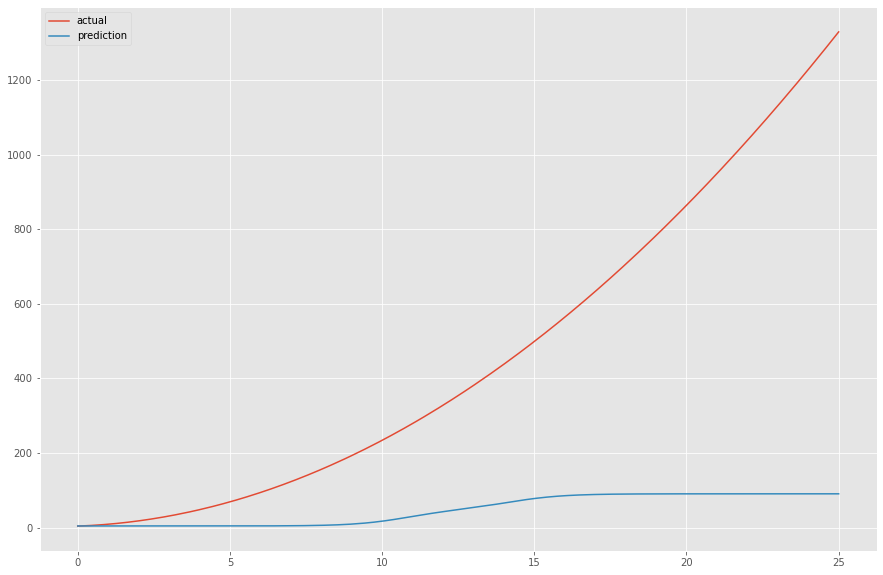

In [65]:
#plotting results

#resizing
plt.rcParams['figure.figsize']=([15, 10])

plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')

plt.legend()

In [37]:
#checking History object to see record of the loss values 
#of the loss values and metric values during training 

'''Source:https://www.tensorflow.org/guide/keras/train_and_evaluate '''

history.history

{'loss': [255.7317657470703,
  255.66738891601562,
  255.6270751953125,
  255.5767059326172,
  255.543212890625,
  255.4953155517578,
  255.50564575195312,
  255.6455078125,
  255.4529266357422,
  255.3940887451172,
  255.3307647705078,
  255.2576141357422,
  255.235107421875,
  255.18881225585938,
  255.2179412841797,
  255.13980102539062,
  255.10055541992188,
  255.04690551757812,
  255.0323944091797,
  255.01425170898438,
  255.06802368164062,
  254.8907470703125,
  254.889892578125,
  254.9031219482422,
  254.86660766601562,
  254.8036346435547,
  254.7381591796875,
  254.6851806640625,
  254.6568145751953,
  254.69412231445312,
  254.59811401367188,
  254.6470947265625,
  254.55783081054688,
  254.4859619140625,
  254.4607391357422,
  254.39517211914062,
  254.3976593017578,
  254.33456420898438,
  254.3268280029297,
  254.2531280517578,
  254.2918701171875,
  254.19400024414062,
  254.184814453125,
  254.11911010742188,
  254.0977325439453,
  254.0809326171875,
  254.04391479492

In [71]:
# Making predictions with this model:


prediction=model.predict([4.0,0.234])

print('This is the amount of power generated for the wind speed you have provided:')
print(prediction)

This is the amount of power generated for the wind speed(s) you have provided:
[[4.3476424]
 [4.3300843]]


<br>

To evaluate this model, I used the method shown in this tutorial, which is the root mean squared error method. 
This method consist of  he square root of the mean of the square of all of the error. 

In [24]:
#Evaluating the performance of a regression model on test set using 
#root mean squared error method

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))


15.996012304201834
17.039363794649415


<br>

### Conclusion about this model

Looking at the shape that the prediction is creating it seems that this prediction model is more accurate.
Cosidering the evaluation method we have performed in the markdown cell above using root mean squared error, we can see that both the train and the set model are performing good as they both give similar values. 
In cases where for example, the train model is performing better than the test model we talk about 'overfitting'. 
'Overfitting' means that the model has an excessively complex structure and learns both the existing relations among data and noise. On the other hand, 'Underfitting'is often the consequence of model being unable to encapsulate the relations among data.
[source](https://realpython.com/train-test-split-python-data/#underfitting-and-overfitting).




<br> 

## Creating *Model* using Sklearn

After my approaches made in previous sections, I have decided to use one last approach with module 'Sklearn'.
Using Keras and Tensorflow to create ad train models using this dataset was good practice and for sure I will keep learning about it. 

I would like now to use this model for linear regression using [this tutorial](https://www.youtube.com/watch?v=b0L47BeklTE&ab_channel=RylanFowers) which I think it might be easier and more accurate to make predictions as my model to be included on the second part of this project.
See details of the process in the markdown and code cells below: 

In [16]:
#First we import the modules we are going to use
from sklearn.linear_model import LinearRegression #import linear regression model
from sklearn.model_selection import train_test_split #to divide data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


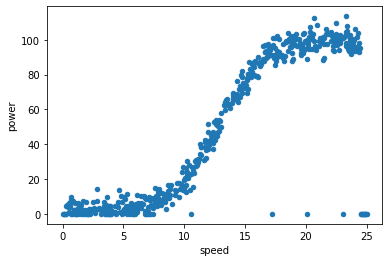

In [15]:
#loading data in this section for better understanding

Powerdataset=pd.read_csv('Powerproduction dataset.csv', delimiter=',')

x=Powerdataset['speed']
y=Powerdataset['power']

#plotting dataset to have this included on this section: 

Powerdataset.plot(kind='scatter', x= 'speed', y='power')

plt.show()



In [17]:
#Let's create our linear regression model
#doing test train split

X_train, X_test, y_train, y_test= train_test_split(Powerdataset.speed, Powerdataset.power)


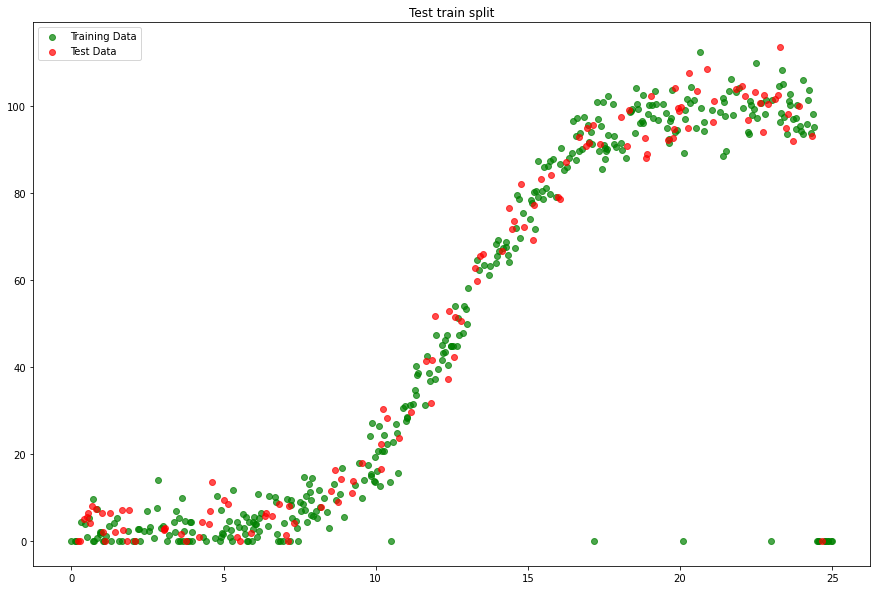

In [17]:
#Let's see how this split looks

plt.scatter(X_train, y_train, label='Training Data', color='g', alpha=.7)
plt.scatter(X_test, y_test, label='Test Data', color= 'r', alpha=.7)
plt.legend()

plt.title('Test train split')

plt.show()

<br> 

Once we have our data split so one part is used for training and the other part is used for testing, as we can see in the visualization above this cell, we move onto the Model creation section.

In [18]:
#Model creation
#naming model LR as Linear Regression as in the tutorial for 
#easier understanding

LR=LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)#Adding x_train and y_train values and reshaping X_train values as they need to be in
#a 1d shape for this to work 

LinearRegression()

<br> 

The next step is to use the model to predict in out test data. See below:

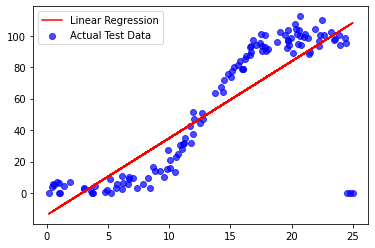

In [19]:
# Predicting

prediction=LR.predict(X_test.values.reshape(-1,1))

#Plotting X_test against prediction results in same plot
plt.plot(X_test, prediction, label='Linear Regression', color='r')
plt.scatter(X_test, y_test, label='Actual Test Data', color='b', alpha=.7)
plt.legend()

plt.show()


<br>

As seen in previous sections where we found the **R squared value** for Simple Linear regression model used on this dataset is  0.531347729791333, which is a low to moderate fit. 
Let's try this model to predict the power output based on the wind speed values we enter as input on our model. 

 


In [20]:
#Making predictions for specific values
#using command predict we enter a sample wind speed: 

print('This is the power generated considering your input: ')
LR.predict(np.array([[25.00]]))[0]


This is the power generated considering your input: 


108.19835082522115

<br> 

We can see that the power generated result we received is the same as the power result we can see in our plot above. The model seems to be accurate enough.
Finally we will 'Sklearn' score function to evaluate this model's accuracy. 


In [21]:
#score function

LR.score(X_test.values.reshape(-1,1),y_test.values)

0.7142720247181078

<br>

Considering the maximum score is 1.0, this does not seem a bad model to fit in this dataset. 

<br>

### Saving my model 

The last action I am going to do with this model is to save it using 'Joblib' module so it can be used by our server to predict the power values depending on the wind speed. I have used this [source](https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models) and this [source](https://towardsdatascience.com/deploy-a-machine-learning-model-using-flask-da580f84e60c) to find out the best approach.

In [36]:
#First we import the module joblib
import joblib


In [39]:

       
joblib_file = "joblib_LR_Model.pkl"  
joblib.dump(LR, "joblib_LR_Model.pkl" ) #saving model as a pickle file. 



['joblib_LR_Model.pkl']

In [26]:
 
# Load from file

joblib_LR_model = joblib.load(joblib_file)


joblib_LR_model

LinearRegression()

In [32]:
#Calculate test score

score = joblib_LR_model.score(X_test.values.reshape(-1,1),y_test.values)


print(score)
print("Test score: {0:.2f} %".format(100 * score))  

0.7142720247181078
Test score: 71.43 %


In [44]:
# Predict the Labels using the reloaded Model


Ypredict = joblib_LR_model.predict(np.array([[25.00]]))[0]


print('This is the power generated considering your input:',Ypredict)



This is the power generated considering your input: 108.19835082522115


<br>

This was my first approach to save the model. I ended using 'Pickle' instead as it seemed to work better and more simply. 
For this I used a Linear regression model following this [tutorial](https://towardsdatascience.com/deploy-a-machine-learning-model-using-flask-da580f84e60c)
See process below. 



In [5]:
#Importing needed modules
from sklearn.model_selection import train_test_split #sklearn to select model and LR
from sklearn.linear_model import LinearRegression
import pickle #importing to save model in disk

In [6]:
#loading dataset

dataset = pd.read_csv('Powerproduction dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
#train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [8]:
#creating model

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [9]:
#Saving model with picker
pickle.dump(regressor, open('model.pkl','wb'))

In [10]:
#Loading and printing model to make predictions

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[7.20]]))#this command predicts for example how much power generates with 7.20 mps of wind

[20.97181645]


<br>

## Web service development

In this section I am going to go through the steps I followed to complete the last part of the tasks which is to develop a web service that will work in conjunction with my Machine Learning model. 

This web server will respond with predicted power values based on speed values sent as HTTP requests.

You can find my references for this section below: 

***
References: 

- [Lecturer's example app repository](https://github.com/ianmcloughlin/random-app)

- [Creating a virtual environment ](https://realpython.com/python-virtual-environments-a-primer/)

- [Flask Quick start documentation](https://flask.palletsprojects.com/en/1.1.x/quickstart/)

- [Bootstrap introduction](https://getbootstrap.com/docs/5.0/getting-started/introduction/)

- [Stackoverflow post ](https://stackoverflow.com/questions/65515800/the-method-is-not-allowed-for-the-requested-url-using-flask-post-method)

- [Deploy machine learning model using flask](https://towardsdatascience.com/how-to-easily-deploy-machine-learning-models-using-flask-b95af8fe34d4)

- [Send data from textbox into flask](https://stackoverflow.com/questions/12277933/send-data-from-a-textbox-into-flask)

- [Python Flask tutorial](https://www.youtube.com/watch?v=MwZwr5Tvyxo&list=RDCMUCCezIgC97PvUuR4_gbFUs5g&index=2&ab_channel=CoreySchafer)

- [Deploy machine learning models using flask](https://www.kdnuggets.com/2019/10/easily-deploy-machine-learning-models-using-flask.html)

***

<br> 

### App creation with Flask first attempt

My first intention was to create an app that loaded the model saved using 'Pickle' or 'Joblib' modules as displayed above and then calculate the predictions to be shown in 'results' tab for the users. 

Finally, this approach did not work as I wanted and it shows a graphic with the prediction values extracted from the linear regression model using Sklearn Linear Regression as shown in previous sections of this notebook. 

Please see below documentation on how I tried to create this version , the works are available in this repository on the drafts folder in a subfolder called *initial_app_trial*.

Please see my code for this initial app below for your reference. For this I used this [guide](https://towardsdatascience.com/how-to-easily-deploy-machine-learning-models-using-flask-b95af8fe34d4) as reference: 

-The structure I followed was to create an app called 'app.py' as a server , a separate file to respond to the http requests and added the model file . Then I created separate folders *Static*, for images and *templates* for my html index file which I intended to contain a button where user could select a value for wind speed and then obtaining a prediction of the power generated based on the model. 

In [ ]:


#initial app trial app.py code. 

from flask import Flask, render_template, jsonify,request,redirect # here I import flask, render_template to load my html document,
#jsonify module which serializes data to JSON format, request to manage object requests
import pickle
import numpy as np

app = Flask(__name__) #creating instance of an app with Flask
model = pickle.load(open('model.pkl','rb')) #Loading my model with pickle


@app.route('/') #defining root route
def home():
    return render_template('index.html')


@app.route('/predict',methods=['POST']) #defining predict route with method post , here I wanted to get values from the index
# form
def predict():

    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Power generated would be{}'.format(output))

@app.route('/results',methods=['POST'])
def results():

    data = request.get_json(force=True)
    prediction = model.predict([np.array(list(data.values()))])

    output = prediction[0]
    return jsonify(output) 

    


if __name__=='__main__': #function to add debugging options
    app.run(debug=True, port=5000)

In [ ]:
#request. py file code 

import requests

url = 'http://127.0.0.1:5000/results' #selecting url and the data to be returned as wind. 
r = requests.post(url,json={'wind':12})

print(r.json())

In [14]:
#Finally this is the index html document that I wanted to used as form to introduce the inputs 

<!DOCTYPE html>
<html >
<head>
  <meta charset="UTF-8">
  <title>Deployment Tutorial 1</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">
  
</head>

<body style="background: #000;">
 <div class="login">
	<h1>Power output prediction</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
    	<input type="text" name="wind" placeholder="wind" required="required" />
        <button type="submit" class="btn btn-primary btn-block btn-large">Predict power output</button>
    </form>

   <br>
   <br>
   {{ prediction_text }}

 </div>
</body>
</html>

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

<br>

Since I was getting repeatedly some error messages when trying this approach. I posted a question in Stackoverflow that gave me some insights. I would like to add this here as reference that I ask for help and I was advised some things that I tried. See [post here](https://stackoverflow.com/questions/65515800/the-method-is-not-allowed-for-the-requested-url-using-flask-post-method).

<br>

### App creation with Flask last attempt

After many trials ( I have some of them included on my drafts folder), I finally created an app that initially I wanted to get the model saved and use to make predictions. I am going to keep working on this, then I am leaving some of the parts of this code on it , although they might not be functional at the moment. 

The result is in the folder named **lr_app**[direct link here](https://github.com/Ainara12/Machine-Learning-Statistics-Project2020/tree/master/my_project/lr_app). 

In order to create this app ( and previous attempts) I created a virtual environment following this [guide](https://realpython.com/python-virtual-environments-a-primer/) since I was having issues to use Flask with my Python configuration. 

Once I created this environment I was able to create my folder including this environment and work with Flask. See here below a copy of the code I used to create this app and some pictures of what you can see  when running it. 

The lr_app includes the following files which are all included on the app folder: 

- Static folder: Includes images used. 
- templates: Includes the html files. 'About.html'for instructions in how to get to the different parts of the web app and 'myform.html' which is the form to enter the values.  
- .dockerignore file.
- Dockefile file as requested contains the commands that user need to call on command line to assemble the image. 
- model.pkl : Model saved with Pickle to be loaded in the app. 
- README : This readme file details instructions to run app in different OS and also instructions in how to build and run Docker image
- Requirements.txt: Includes the packages needed to run this app. 
- server.py : This is the app code 


In [15]:
#code for server.py 

#importing necessary modules
from flask import Flask, render_template, request  
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl','rb')) #Loading my model with pickle

@app.route('/')
def index():
        return render_template('about.html')
        return  app.send_static_file('wind-turbines.jpg') 
        

@app.route('/submit_form',methods=['POST','GET']) #Creating a submit form for user to enter the wind speed necessary values
def submit_form():
    return render_template('myform.html')# myform file is in 'templates' folder return using render_template method
    if request.method == 'POST':
        # Get the data from the POST request.
        data = request.form('text', type=int)
        return redirect(url_for('predict', pred=data)) #returning data entered through form as redirect url.
    else:
        print('Something went wrong here')


@app.route('/<pred>') #accessing to this adding the entered value into the route returns the plot with our model 
#prediction values in relation to the actual values
def predict(pred):
    
    return app.send_static_file('Prediction plot LR.png') 

 
if __name__=='__main__':
    app.run(debug=True, port=5000)




 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\fainl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [17]:
#myform.html document code 


<!DOCTYPE html>
<html>
<head>
	<title>Power output calculator</title>

</head>
<body>

<form>

<form action="/submit_form" method="post" clas="reveal-content">

    Please enter wind speed to calculate power output <br>

    <input name="text" type="number" step="0.01">
  <button type="Submit" class="btn btn-default btn-lg">Send</button>
</form>


</form>
</body>
</html>


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [18]:
<!DOCTYPE html>
<html>
<head>
	<title>About page</title>

</head>

<body>

	<h1> Instructions for this web app</h1>
	
	'With this app you can enter wind speed values to get a prediction graphic based on my model based on the Powerproduction dataset. Please navigate to the next page to access to submit form using the route /submit_form'

    
</body>
</html>

SyntaxError: invalid syntax (<ipython-input-18-c5794f4dea90>, line 1)

<br>

The final page returns an image of the prediction using Linear Regression in relation to the actual data. 

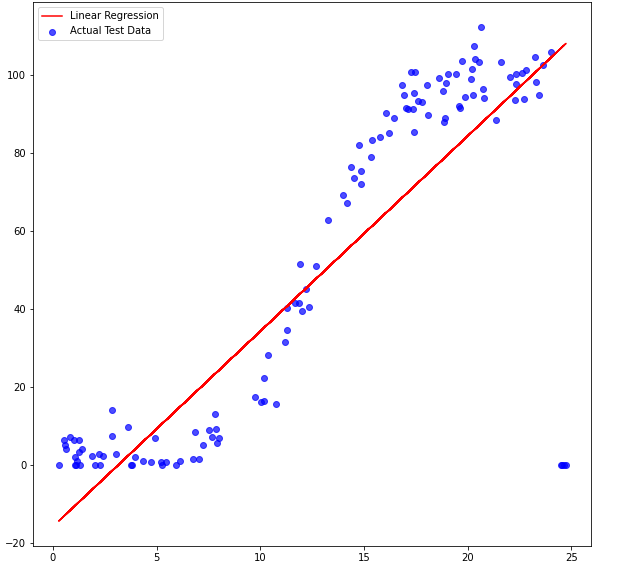


<br>

As a conclusion to this project I would like to add here the images to show how the web app looks in case there are any errors when try to run it. 

This is the initial page with instructions in how to operate this web app: 

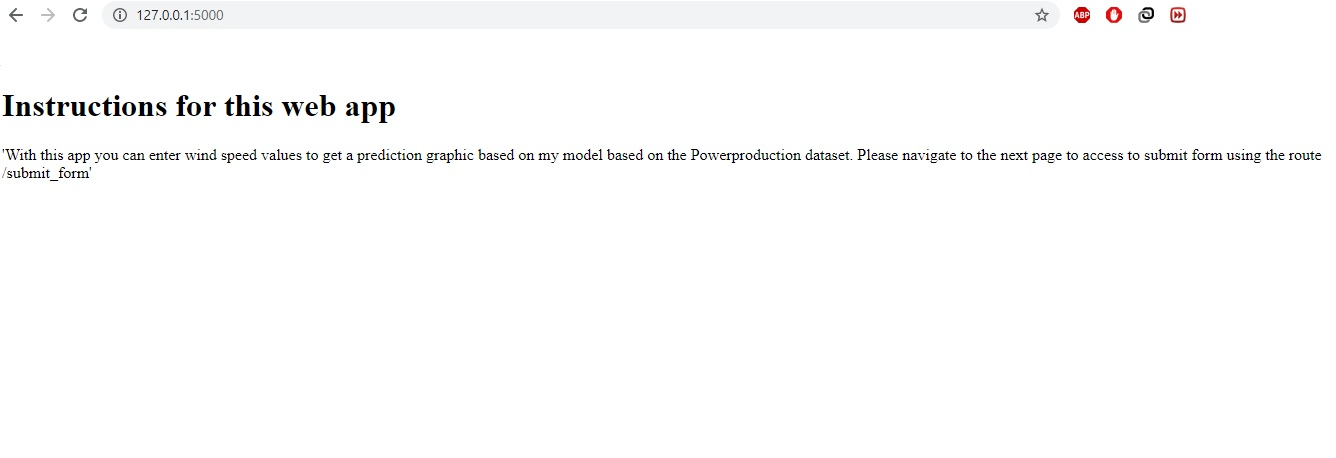


<br> 

This is the main page with the form : 

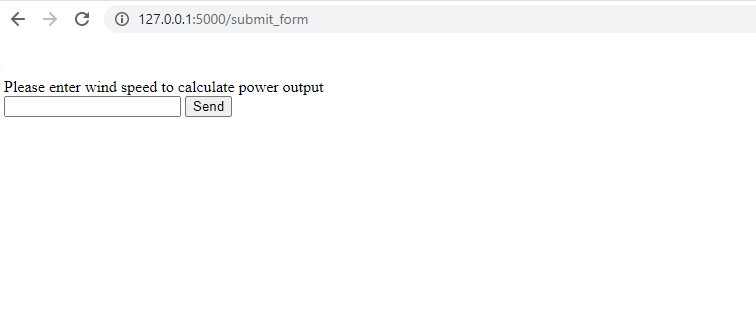



<br>

When we enter a value it goes to the bar and we can move to the 'prediction' page where the image displays: 

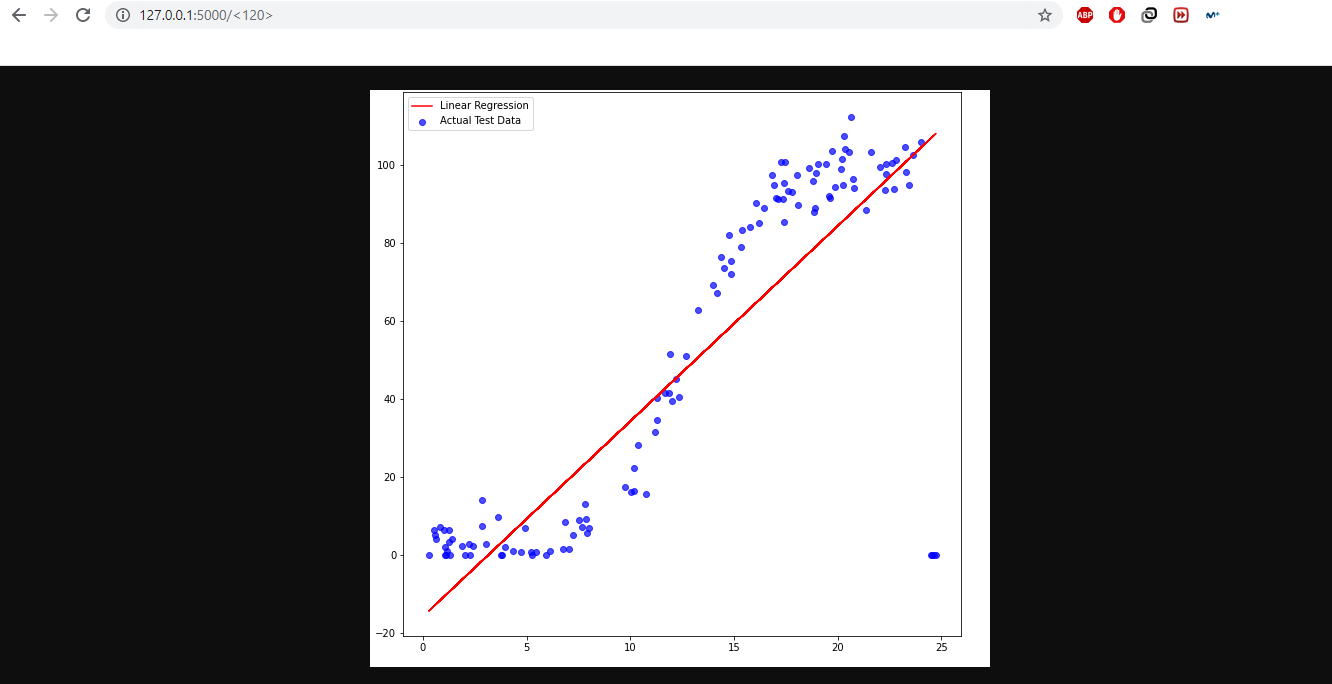

## END OF PROJECT